ZMQInteractiveShell
----iPython notebook----
-
** Original DB **


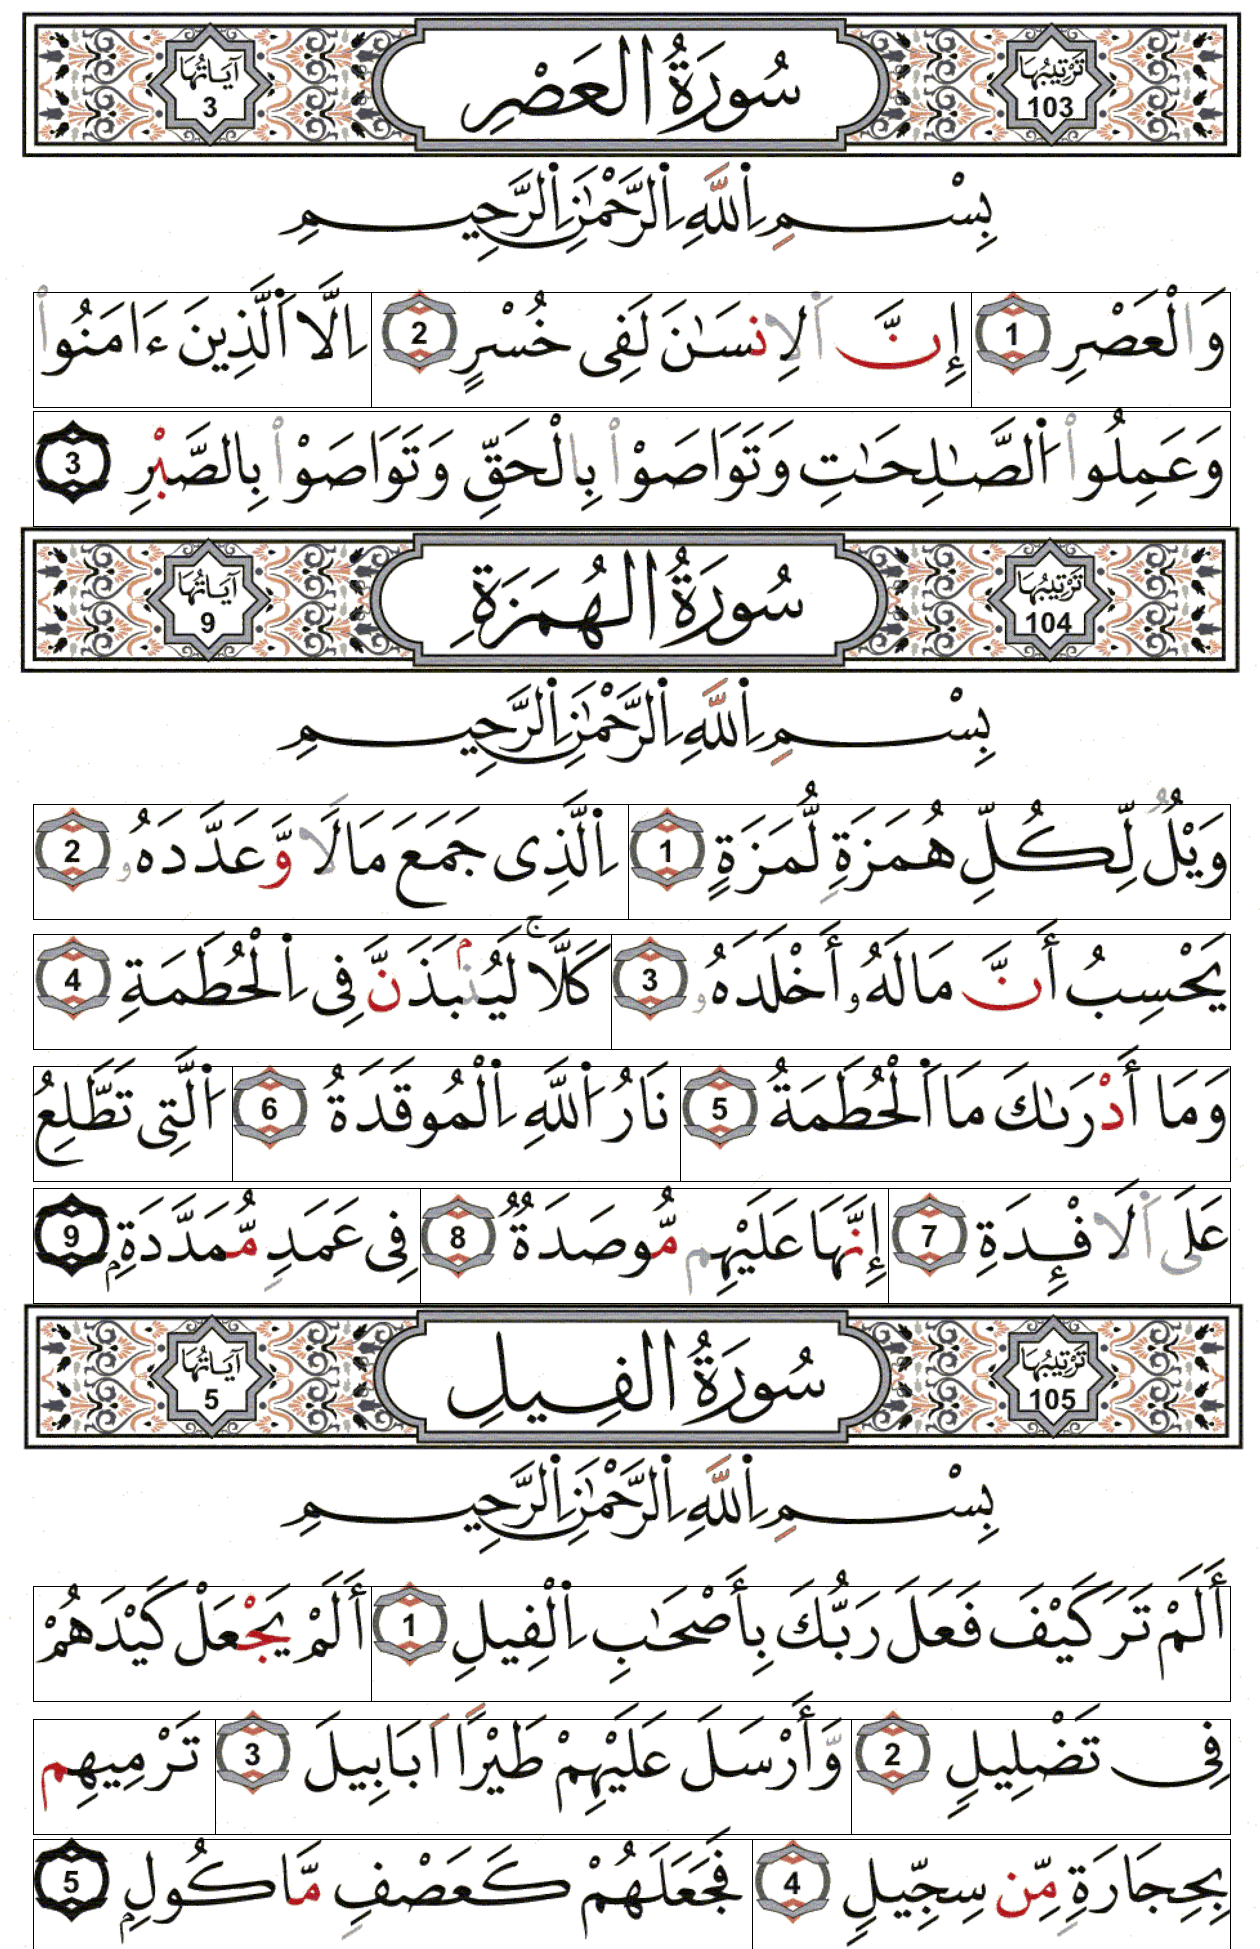

-
** Golden Quran DB **


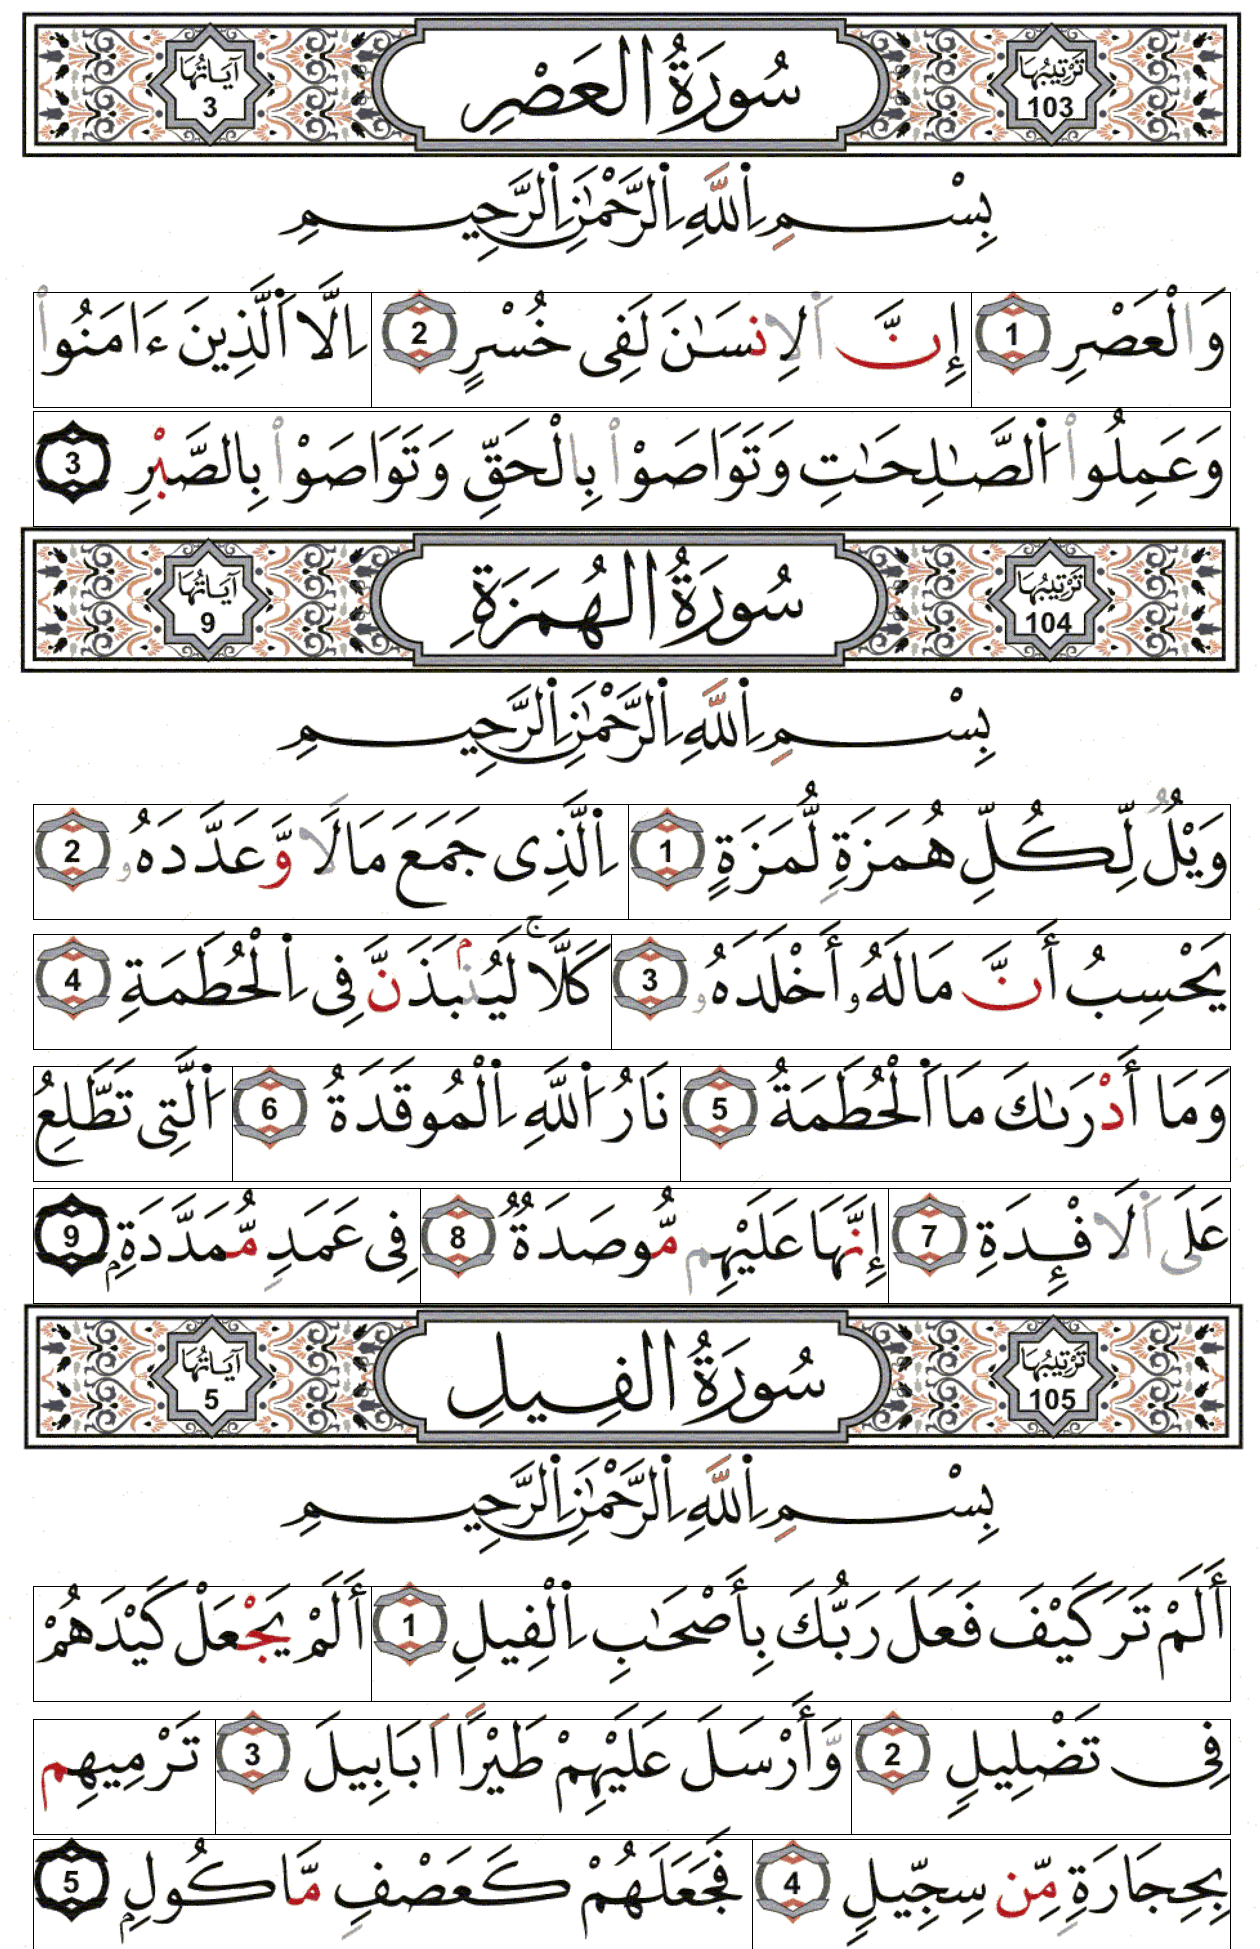

In [1]:
import sqlite3
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
from IPython.display import display
from IPython import get_ipython

##################
#
# Type of script
#
##################
def type_of_script():
    try:
        shell = get_ipython().__class__.__name__
        print(shell)
        if shell == 'ZMQInteractiveShell':
            return True   # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        else:
            return False  # Other type (?)
    except NameError:
        return False      # Probably standard Python interpreter
        
# Page filename
page_number = '601'
page_file_name = 'page' + page_number.zfill(3) + '.png'

# Open the image
source_img = Image.open(page_file_name).convert("RGBA")
golden_source_img = Image.open(page_file_name).convert("RGBA")

# Get a draw object
draw = ImageDraw.Draw(source_img)
golden_draw = ImageDraw.Draw(golden_source_img)

# Get the rows from ayahinfo_1260.db
conn = sqlite3.connect("ayahinfo_1260.db")
conn.row_factory = sqlite3.Row
cur = conn.cursor()
QUERY = 'select * from glyphs where page_number=' + page_number + ' order by glyph_id'
cur.execute(QUERY)

# Loop over rows and draw boxes
for row in cur:
    draw.rectangle(((row['min_x'], row['min_y']), (row['max_x'], row['max_y'])), outline="black")

# Get the rows from Golden Quran db
golden_conn = sqlite3.connect("Qaloon_new_1260.db")
golden_conn.row_factory = sqlite3.Row
golden_cur = golden_conn.cursor()
QUERY = 'select * from page where page_number=' + page_number + ' order by id'
golden_cur.execute(QUERY)

# Loop over rows and draw boxes
for golden_row in golden_cur:
    x = int(golden_row['x'])
    y = int(golden_row['y'])
    max_x = x + int(golden_row['width'])
    max_y = y + int(golden_row['height'])
    golden_draw.rectangle(((x, y), (max_x, max_y)), outline="black")

if not type_of_script():
    print('----terminal----')
    print('-')
    print('** Original DB **')
    source_img.show()
    print('-')
    print('** Golden Quran DB **')
    golden_source_img.show()
else:
    print('----iPython notebook----')
    print('-')
    print('** Original DB **')
    display(source_img)
    print('-')
    print('** Golden Quran DB **')
    display(golden_source_img)